In [18]:
from matplotlib import pyplot as plt
import numpy as np
import pennylane as qml

## Load data

In [19]:
energies_hee = np.load('../local_data/energies_cnot_1.npy')
convergences_hee = np.load('../local_data/convergences_cnot_1.npy')
grads_hee = np.load('../local_data/grad_norms_cnot_1.npy')
grad_variances_hee = np.load('../local_data/grad_variances_cnot_1.npy')

In [20]:
energies_ng = np.load('../local_data/energies_cnot_2.npy')
convergences_ng = np.load('../local_data/convergences_cnot_2.npy')
grads_ng = np.load('../local_data/grad_norms_cnot_2.npy')
grad_variances_ng = np.load('../local_data/grad_variances_cnot_2.npy')

## Plots


In [21]:
mean_loss_hee = np.mean(energies_hee, axis=1)
mean_loss_ng = np.mean(energies_ng, axis=1)

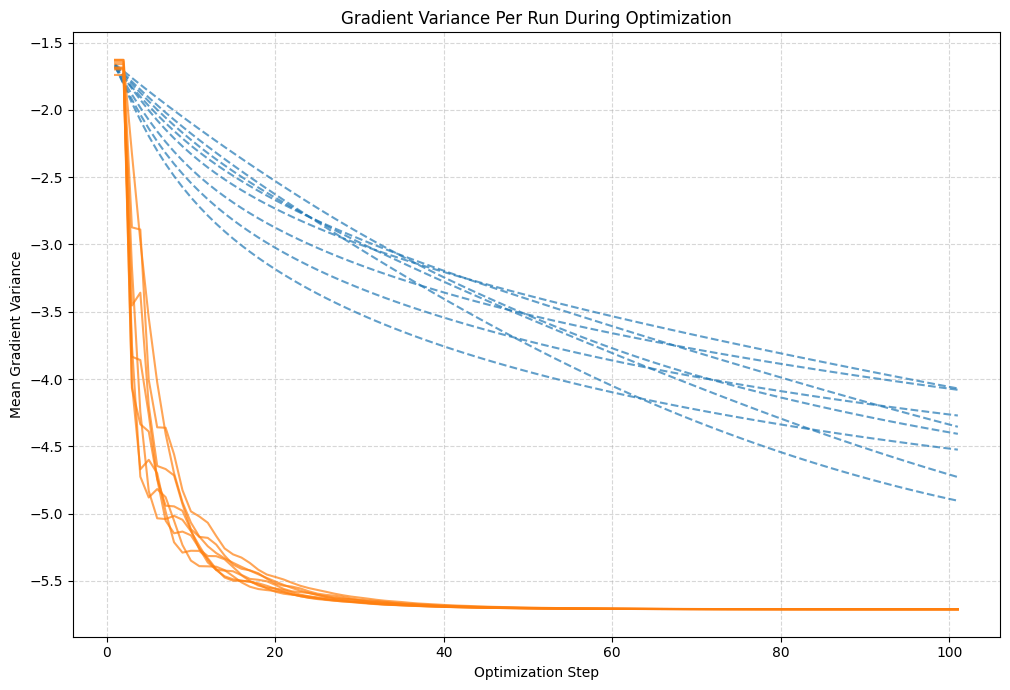

In [22]:
# --- Plotting Code ---
plt.figure(figsize=(12, 7)) # Increased figure width to accommodate the legend

steps = np.arange(1, mean_loss_hee.shape[1] + 1)

# Loop to plot and label each 'Hardware Efficient' line
for i, variance_curve in enumerate(mean_loss_hee):
    # The label is now unique for each line (e.g., 'HE Run 1', 'HE Run 2')
    plt.plot(steps, variance_curve, linestyle='--', color='C0', alpha=0.7, 
             label=f'Hardware Efficient w/ L={2*(i+1)}')

# Loop to plot and label each 'QResNet' line
for i, variance_curve in enumerate(mean_loss_ng):
    plt.plot(steps, variance_curve, linestyle='-', color='C1', alpha=0.7, 
             label=f'QResNet w/ L={2*(i+1)}')

plt.xlabel('Optimization Step')
plt.ylabel('Mean Gradient Variance')
plt.title('Gradient Variance Per Run During Optimization')
plt.grid(True, which="both", ls="--", alpha=0.5)

# --- Legend Management ---
# Place the legend outside the plot area to the right to avoid clutter
#plt.legend(title='Individual Runs', bbox_to_anchor=(1.02, 1), loc='upper left')

# Adjust plot layout to make room for the external legend
plt.tight_layout(rect=[0, 0, 0.85, 1]) 

plt.show()

In [23]:
layers = np.arange(2, 17, 2)

In [24]:
dataset = qml.data.load('qchem', molname="He2")[0]
exact_energy = dataset.fci_energy
layers = np.arange(2, 17, 2)

In [25]:
min_hee = np.min(energies_hee, axis=1)[:,-1]
min_ng = np.min(energies_ng, axis=1)[:,-1]

In [34]:
min_ng

array([-5.71068525, -5.71148634, -5.71201611, -5.71154356, -5.71178436,
       -5.71180964, -5.71160078, -5.71172523])

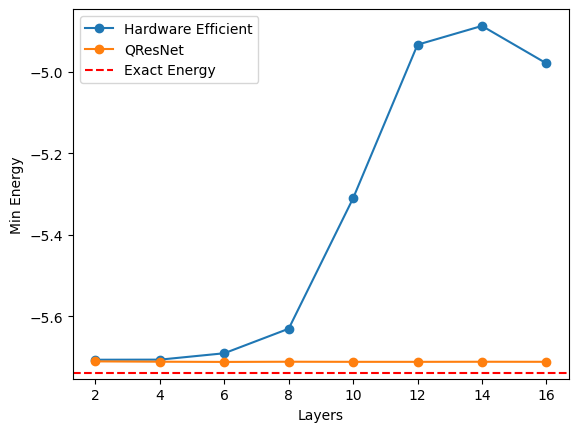

In [32]:
plt.plot(layers, min_hee, marker='o', label='Hardware Efficient')
plt.plot(layers, min_ng, marker='o', label='QResNet')
plt.axhline(exact_energy, color='r', linestyle='--', label='Exact Energy')
plt.xlabel('Layers')
plt.ylabel('Min Energy')
plt.legend()
plt.show()

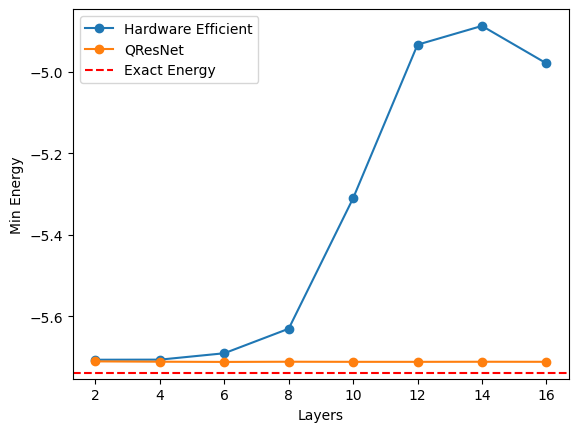

In [27]:
plt.plot(layers, min_hee, marker='o', label='Hardware Efficient')
plt.plot(layers, min_ng, marker='o', label='QResNet')
plt.axhline(exact_energy, color='r', linestyle='--', label='Exact Energy')
plt.xlabel('Layers')
plt.ylabel('Min Energy')
plt.legend()
plt.show()

In [28]:
median_hee = np.median(energies_hee, axis=1)[:,-1]
median_ng = np.median(energies_ng, axis=1)[:,-1]

In [33]:
median_ng

array([-5.71023655, -5.71016216, -5.71010852, -5.7101264 , -5.71015167,
       -5.71017742, -5.71017385, -5.71020222])

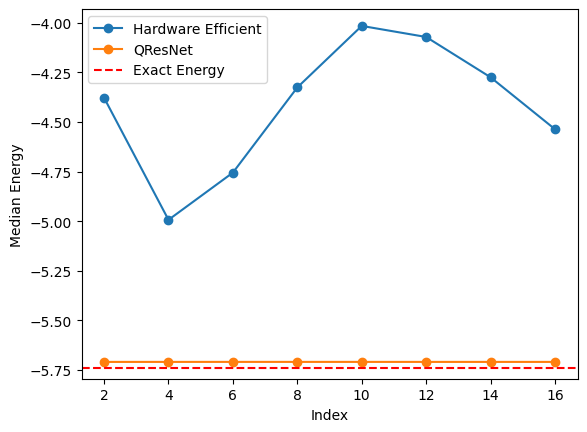

In [29]:
plt.plot(layers, median_hee, marker='o', label='Hardware Efficient')
plt.plot(layers, median_ng, marker='o', label='QResNet')
plt.axhline(exact_energy, color='r', linestyle='--', label='Exact Energy')
plt.xlabel('Index')
plt.ylabel('Median Energy')
plt.legend()
plt.show()

In [38]:
mean_var_hee = np.mean(grads_hee, axis=1)
mean_var_ng = np.mean(grads_ng, axis=1)

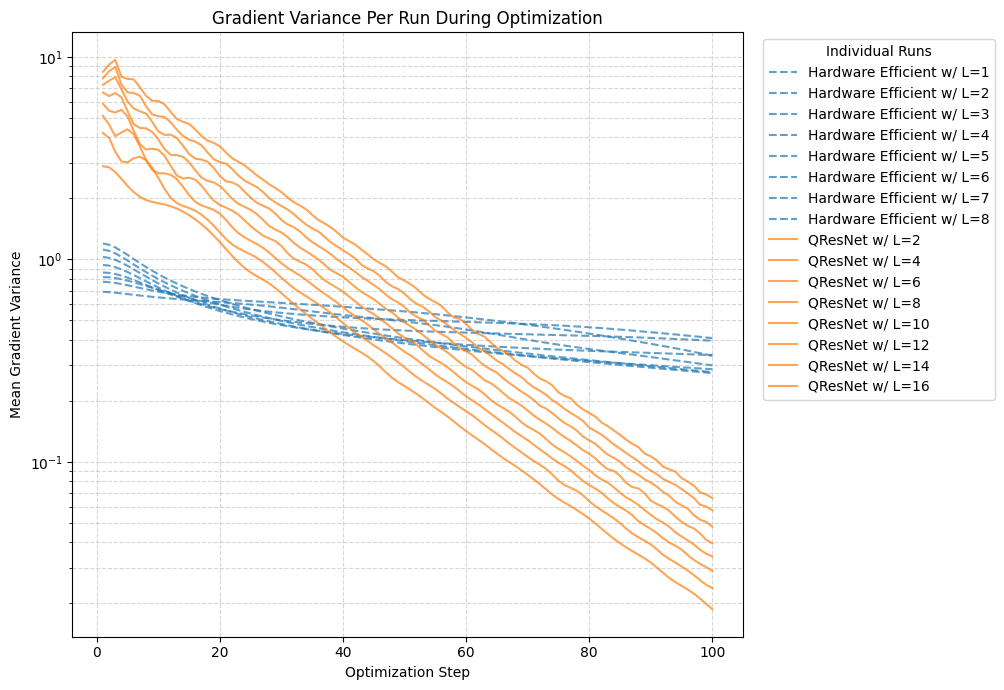

In [41]:
# --- Plotting Code ---
plt.figure(figsize=(12, 7)) # Increased figure width to accommodate the legend

steps = np.arange(1, mean_var_hee.shape[1] + 1)

# Loop to plot and label each 'Hardware Efficient' line
for i, variance_curve in enumerate(mean_var_hee):
    # The label is now unique for each line (e.g., 'HE Run 1', 'HE Run 2')
    plt.plot(steps, variance_curve, linestyle='--', color='C0', alpha=0.7, 
             label=f'Hardware Efficient w/ L={i+1}')

# Loop to plot and label each 'QResNet' line
for i, variance_curve in enumerate(mean_var_ng):
    plt.plot(steps, variance_curve, linestyle='-', color='C1', alpha=0.7, 
             label=f'QResNet w/ L={2*(i+1)}')

plt.yscale('log')
plt.xlabel('Optimization Step')
plt.ylabel('Mean Gradient Variance')
plt.title('Gradient Variance Per Run During Optimization')
plt.grid(True, which="both", ls="--", alpha=0.5)

# --- Legend Management ---
# Place the legend outside the plot area to the right to avoid clutter
plt.legend(title='Individual Runs', bbox_to_anchor=(1.02, 1), loc='upper left')

# Adjust plot layout to make room for the external legend
plt.tight_layout(rect=[0, 0, 0.85, 1]) 

plt.show()